#Description

Our study is unique in that we use the Extracted_Business_Description.csv dataset, which is comprised solely of company descriptions and is suitable for unsupervised learning, specifically clustering. To embed the descriptions, we utilize a sentence transformer, specifically the 'nli-distilroberta-base-v2' model. We perform agglomerative clustering with 11 clusters, corresponding to the number of sectors under analysis. We then use TF-IDF to identify the most frequent words in each cluster. In addition, we also explore the case where the dimensions are reduced to two dimensions.

#Preprocessing the dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/companyclassification/datasets/Extracted_Business_Description.csv")
data.head()

,Unnamed: 0,docLabels,Descriptions,Company Tickers,Company Names
0,0,0,"1-800-Flowers.com, Inc., together with its sub...",NasdaqGS:FLWS,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)"
1,1,1,"12 Retech Corporation, through its subsidiarie...",OTCPK:RETC,12 Retech Corporation (OTCPK:RETC)
2,2,2,"1347 Property Insurance Holdings, Inc., throug...",NasdaqGM:PIH,"1347 Property Insurance Holdings, Inc. (Nasdaq..."
3,3,3,"1847 Holdings LLC, through its subsidiaries, p...",OTCPK:EFSH,1847 Holdings LLC (OTCPK:EFSH)
4,4,4,1mage Software Inc operates in the technology ...,OTCPK:ISOL,"1mage Software, Inc. (OTCPK:ISOL)"


In [ ]:
data = data[data.columns[2:3]]

In [ ]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=0cb79a4a06e274f682a9b373f3a90711eb8e8617d08160d3f93951d0985bb4c6
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


#Embedding the sentences

In [ ]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import os
import re
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer('sentence-transformers/nli-distilroberta-base-v2')
embeddings = model.encode(data["Descriptions"].values)
embeddings

array([[ 6.5402210e-02,  1.0849271e+00, -3.7323534e-01, ...,
         8.0173649e-04,  5.5614732e-02,  8.1896871e-01],
       [ 2.8225759e-02,  1.4589132e-01, -4.4327280e-01, ...,
         3.5048828e-01,  3.7145054e-01, -2.4246128e-02],
       [-8.0897339e-02,  5.1820254e-01,  5.8964044e-02, ...,
        -3.8877013e-01, -2.4242660e-01,  1.0527291e-01],
       ...,
       [ 2.6381001e-01,  3.7465197e-01, -4.2085963e-01, ...,
        -3.7270224e-01, -3.1273246e-01,  4.2939981e-04],
       [ 9.1703445e-02,  3.7634480e-01, -1.0610578e+00, ...,
        -8.9088297e-01,  8.5695434e-01, -3.5923180e-01],
       [ 1.5482309e-01,  4.9191514e-01, -6.0197067e-01, ...,
         6.1195588e-01,  3.6949968e-01,  4.7007486e-01]], dtype=float32)

#Agglomerative Clustering

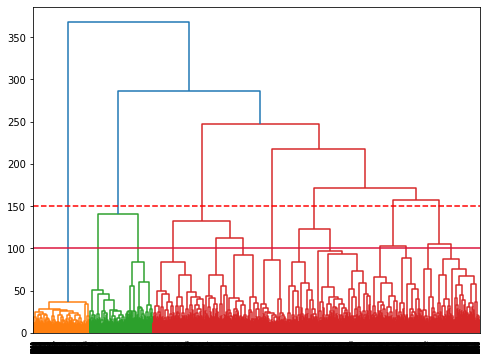

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

clusters = hierarchy.linkage(embeddings, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(150, color='red', linestyle='--');
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(100, color='crimson');

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA

new = embeddings
# pca = PCA(2)
# new = pca.fit_transform(embeddings)

connectivity = kneighbors_graph(new, n_neighbors=10, include_self=False)

#Based on the dendrogram (looking at the second line), the number of clusters is 13 but the dividing line nearly matches one of the line of division of clusters
#If you take out that division, the number of clusters is 11 - the same as number of sectors based of GICS
model = AgglomerativeClustering(n_clusters=11, connectivity=connectivity, linkage='ward').fit(new)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:280: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


In [ ]:
model.labels_

array([ 3,  0, 10, ...,  5,  1,  5])

#Visualization

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:280: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


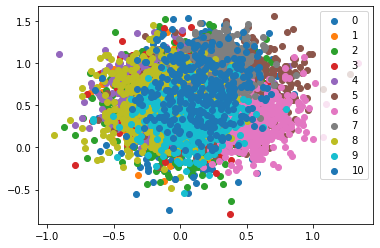

In [ ]:
label = model.fit_predict(new)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(new[label == i , 0] , new[label == i , 1] , label = i)
plt.legend()
plt.show()

#Most frequent words in each cluster

In [ ]:
label0 = []
label1 = []
label2 = []
label3 = []
label4 = []
label5 = []
label6 = []
label7 = []
label8 = []
label9 = []
label10 = []

In [ ]:
for i in range(len(label)):
  if label[i] == 0:
    label0.append(data["Descriptions"][i])
  if label[i] == 1:
    label1.append(data["Descriptions"][i])
  if label[i] == 2:
    label2.append(data["Descriptions"][i])
  if label[i] == 3:
    label3.append(data["Descriptions"][i])
  if label[i] == 4:
    label4.append(data["Descriptions"][i])
  if label[i] == 5:
    label5.append(data["Descriptions"][i])
  if label[i] == 6:
    label6.append(data["Descriptions"][i])
  if label[i] == 7:
    label7.append(data["Descriptions"][i])
  if label[i] == 8:
    label8.append(data["Descriptions"][i])
  if label[i] == 9:
    label9.append(data["Descriptions"][i])
  if label[i] == 10:
    label10.append(data["Descriptions"][i])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

In [ ]:
def finding_top_features(key, dataset):
  my_stop_words = text.ENGLISH_STOP_WORDS.union(["company"])
  vectorizer = TfidfVectorizer(stop_words=my_stop_words)
  tfidf_matrix = vectorizer.fit_transform(dataset)
  feature_names = vectorizer.get_feature_names_out()
  feature_scores = tfidf_matrix.mean(axis=0).tolist()[0]
  features_dict = dict(zip(feature_names, feature_scores))
  sorted_features = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)
  top_features = [(feature, score) for feature, score in sorted_features[:30]]

  dictionary = {}
  dictionary[key] = top_features
  print(dictionary)

In [ ]:
new_labels = {"label0" : label0,
              "label1" : label1,
              "label2" : label2,
              "label3" : label3,
              "label4" : label4,
              "label5" : label5,
              "label6" : label6,
              "label7" : label7,
              "label8" : label8,
              "label9" : label9,
              "label10" : label10}

In [ ]:
for key in new_labels.keys():
  finding_top_features(key, new_labels[key])

{'label0': [('services', 0.06029710883983828), ('solutions', 0.036843888631743676), ('provides', 0.032048544026249584), ('management', 0.03006896331979902), ('products', 0.029280490543954287), ('offers', 0.026973461894494503), ('software', 0.026066806744337923), ('based', 0.02551164971466004), ('mobile', 0.025272928329562242), ('media', 0.024530867978049178), ('data', 0.024016685552828636), ('digital', 0.02230168875848836), ('platform', 0.02113584549709287), ('business', 0.020902031202501378), ('network', 0.02046756193501534), ('operates', 0.01976063117118011), ('internet', 0.019655397737846296), ('technology', 0.01948986854109752), ('service', 0.01941177875783909), ('marketing', 0.019325688583628358), ('segment', 0.01915466433580579), ('content', 0.018974598047767393), ('corporation', 0.018667126832501425), ('systems', 0.01854336346714725), ('video', 0.01806446285264084), ('communications', 0.01793465149047129), ('cloud', 0.017856056725872583), ('founded', 0.017781697081037273), ('inc

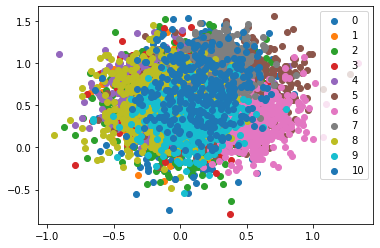

In [ ]:
for i in u_labels:
    plt.scatter(new[label == i , 0] , new[label == i , 1] , label = i)
plt.legend()
plt.show()

Visualization when the dimensionality is reduced to 2 dimensions:

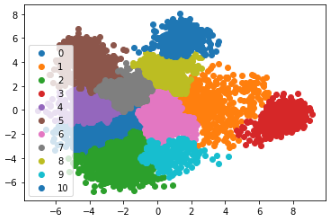